# Machine Learning Project - What's Cooking?

## General Libraries and Functions

In [1]:
# Basic Libraries
import numpy as np #Library for Numeric Computations in Python
import pandas as pd #Library for Data Acquisition and Preparation
import seaborn as sb #Library for drawing statistical graphs
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # setting the default Seaborn style for graphics
from pathlib import Path
Path('./ML Result').mkdir(mode = 0o770, parents = True, exist_ok = True)

In [2]:
def sort_list_occurrences(l):
    from collections import Counter
    l_sorted = Counter(l).most_common()
    return l_sorted

def cumulated_list(l):
    s = ''
    for x in l:
        x = x.strip()
        x = x.replace(' ', '_')
        s = s + x + ' '
    return s.strip()

#To check for null dates: isinstance(x, pd._libs.tslibs.nattype.NaTType)
#To convert array of character digits to float:
#cost_array['Cost'] = cost_array['Cost'].apply(lambda x: x.strip('][').split(', '))
#cost_array['Cost'] = cost_array['Cost'].apply(lambda x: ''.join([str(item).strip("\'") for item in x]))
#cost_array['Cost'] = cost_array['Cost'].astype(float)

In [3]:
import math
import re
from decimal import Decimal

def rounding (target, decimal_place):
    place = str(decimal_place)
    placing = '{:.'
    placing = placing + place + 'f}'
    if (re.search(r'e-', str(target))):
        if (float(re.findall(r'e-\d+', str(target))[0].replace('e-', ''))>decimal_place):
            return placing.format(0)
        else:
            return target
    target_str = str(target)
    try:
        target_str_2 = re.findall(r'\.\d+', target_str)[0].strip('.')
        round_target = target_str_2[decimal_place]
    except:
        return placing.format(target)
    if int(round_target)<5:
        before_decimal = re.findall(r'\-*\d+\.', target_str)[0]
        if (before_decimal[0]=='-'):
            return placing.format(float(re.findall(r'\d+\.', target_str)[0] + re.findall(r'\.\d+', target_str)[0].strip('.')[:decimal_place])*-1)
        else:
            return placing.format(float(re.findall(r'\d+\.', target_str)[0] + re.findall(r'\.\d+', target_str)[0].strip('.')[:decimal_place]))
    else:
        before_decimal = re.findall(r'\-*\d+\.', target_str)[0]
        if (before_decimal[0]=='-'):
            return placing.format(float(Decimal(re.findall(r'\d+\.', target_str)[0] + re.findall(r'\.\d+', target_str)[0].strip('.')[:decimal_place]) + Decimal(str(1/10**decimal_place)))*-1)
        else:
            return placing.format(float(Decimal(re.findall(r'\d+\.', target_str)[0] + re.findall(r'\.\d+', target_str)[0].strip('.')[:decimal_place]) + Decimal(str(1/10**decimal_place))))
#Usage example
#df_final = df_final.apply(lambda col: rounding(x,4) if type(x)==float else x for x in col)
rounding(0.6987, 2)

'0.70'

In [4]:
from multiprocessing import Pool
from functools import partial, reduce

def parallelize(data, func, process_num=32):
    data_split = np.array_split(data, process_num)
    pool = Pool(process_num)
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

def run_subset(func, subset):
    return subset.apply(func, axis = 1)

def parallelize_on_rows(df, func, process_num=32):
    return parallelize(df, partial(run_subset, func), process_num)

def wild_match(df):
    matched = 0
    df.Input = df['Combos'].split('-')
    for items in df.Input:
        if (items in df.Antecedent.split('-')):
            matched+=1
    return matched                   

In [5]:
cook_train = pd.read_json('train.json')
cook_test = pd.read_json('test.json')

In [6]:
cook_train['cuisine'] = cook_train['cuisine'].apply(lambda x: x.capitalize())
cook_train['ingredients'] = cook_train['ingredients'].apply(lambda x: list(set(x))) #removing duplicate ingredients

cook_train['cumulated_ingredients'] = cook_train['ingredients'].apply(lambda x: cumulated_list(x))
cook_train['number of ingredients'] = cook_train['ingredients'].apply(lambda x: len(x))

display(cook_train.dtypes)
display(cook_train)

id                        int64
cuisine                  object
ingredients              object
cumulated_ingredients    object
number of ingredients     int64
dtype: object

,id,cuisine,ingredients,cumulated_ingredients,number of ingredients
0,10259,Greek,"[garbanzo beans, garlic, black olives, grape t...",garbanzo_beans garlic black_olives grape_tomat...,9
1,25693,Southern_us,"[ground black pepper, plain flour, salt, green...",ground_black_pepper plain_flour salt green_tom...,11
2,20130,Filipino,"[green chilies, cooking oil, mayonaise, salt, ...",green_chilies cooking_oil mayonaise salt grill...,12
3,22213,Indian,"[salt, vegetable oil, wheat, water]",salt vegetable_oil wheat water,4
4,13162,Indian,"[garam masala, chili powder, onions, lemon jui...",garam_masala chili_powder onions lemon_juice d...,20
...,...,...,...,...,...
39769,29109,Irish,"[warm water, boiling water, whole wheat flour,...",warm_water boiling_water whole_wheat_flour sal...,12
39770,11462,Italian,"[rotini, red pepper, broccoli florets, pitted ...",rotini red_pepper broccoli_florets pitted_blac...,7
39771,2238,Irish,"[ground nutmeg, salt, raisins, hot tea, milk, ...",ground_nutmeg salt raisins hot_tea milk ground...,12
39772,41882,Chinese,"[baking powder, Shaoxing wine, store bought lo...",baking_powder Shaoxing_wine store_bought_low_s...,21


In [7]:
cook_test['ingredients'] = cook_test['ingredients'].apply(lambda x: list(set(x))) #removing duplicate ingredients
cook_test['cumulated_ingredients'] = cook_test['ingredients'].apply(lambda x: cumulated_list(x))
cook_test['number of ingredients'] = cook_test['ingredients'].apply(lambda x: len(x))

display(cook_test.dtypes)
display(cook_test)

id                        int64
ingredients              object
cumulated_ingredients    object
number of ingredients     int64
dtype: object

,id,ingredients,cumulated_ingredients,number of ingredients
0,18009,"[baking powder, raisins, milk, white sugar, eg...",baking_powder raisins milk white_sugar eggs al...,6
1,28583,"[vanilla wafers, bananas, light rum, egg yolks...",vanilla_wafers bananas light_rum egg_yolks mil...,11
2,41580,"[sausage links, fronds, onions, fennel bulb, o...",sausage_links fronds onions fennel_bulb olive_...,6
3,29752,"[garlic cloves, dried thyme, all-purpose flour...",garlic_cloves dried_thyme all-purpose_flour br...,21
4,35687,"[ground black pepper, leeks, parmigiano reggia...",ground_black_pepper leeks parmigiano_reggiano_...,8
...,...,...,...,...
9939,30246,"[large egg whites, large egg yolks, salt, anjo...",large_egg_whites large_egg_yolks salt anjou_pe...,9
9940,36028,"[salt, sweet potatoes, hot sauce, adobo sauce,...",salt sweet_potatoes hot_sauce adobo_sauce butter,5
9941,22339,"[black pepper, parmigiano reggiano cheese, sal...",black_pepper parmigiano_reggiano_cheese salt l...,8
9942,42525,"[quickcooking grits, cayenne, Tabasco Pepper S...",quickcooking_grits cayenne Tabasco_Pepper_Sauc...,15


## Exploratory Data Analysis

In [8]:
cook_train['cuisine'].value_counts()

Italian         7838
Mexican         6438
Southern_us     4320
Indian          3003
Chinese         2673
French          2646
Cajun_creole    1546
Thai            1539
Japanese        1423
Greek           1175
Spanish          989
Korean           830
Vietnamese       825
Moroccan         821
British          804
Filipino         755
Irish            667
Jamaican         526
Russian          489
Brazilian        467
Name: cuisine, dtype: int64

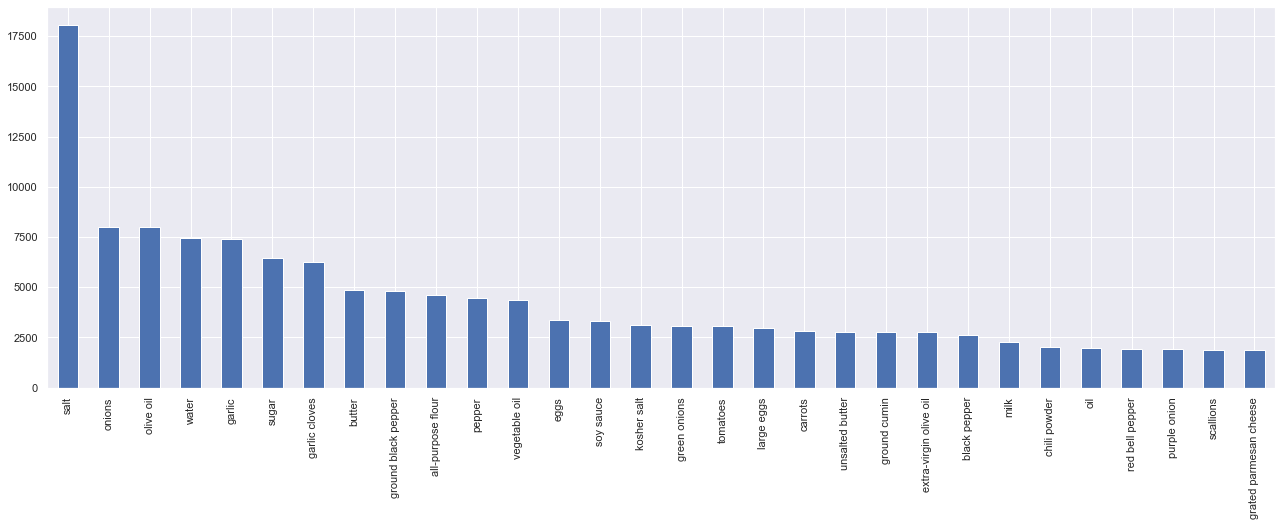

In [9]:
fig, ax = plt.subplots(figsize=(22,7))
all_ingredients = []
for x in cook_train['ingredients']:
    for y in x:
        all_ingredients.append(y)
        
all_ingredients = pd.Series(all_ingredients)
all_ingredients.value_counts().sort_values(ascending=False).head(30).plot.bar(ax = ax)

In [10]:
cuisine = cook_train['cuisine'].unique()

all_cuisines = dict()
for cs in cuisine:
    i = []
    for ing_list in cook_train[cook_train['cuisine']==cs]['ingredients']:
        for ing in ing_list:
            i.append(ing)
    all_cuisines[cs] = i

all_cuisines.keys()

dict_keys(['Greek', 'Southern_us', 'Filipino', 'Indian', 'Jamaican', 'Spanish', 'Italian', 'Mexican', 'Chinese', 'British', 'Thai', 'Vietnamese', 'Cajun_creole', 'Brazilian', 'French', 'Japanese', 'Irish', 'Korean', 'Moroccan', 'Russian'])

In [11]:
cuisine_features = pd.DataFrame.from_dict(all_cuisines, orient = 'index').reset_index()
cuisine_features.columns = [str(x) for x in cuisine_features.columns]
ci = pd.DataFrame()

for key in all_cuisines.keys():
    df = cuisine_features[cuisine_features['index']==key].transpose().drop(['index'], axis = 0)
    df.columns = ['Ingredients']
    df['Cuisine'] = key
    df = df.groupby(['Cuisine', 'Ingredients']).size().reset_index(name = 'Count')
    df.sort_values(by = ['Count'], ascending = False, inplace = True)
    ci = ci.append(df, ignore_index=True, verify_integrity=False, sort=None)
    
ci

,Cuisine,Ingredients,Count
0,Greek,salt,571
1,Greek,olive oil,503
2,Greek,dried oregano,266
3,Greek,garlic cloves,253
4,Greek,feta cheese crumbles,252
...,...,...,...
29174,Russian,green beans,1
29175,Russian,greek yogurt,1
29176,Russian,greek style plain yogurt,1
29177,Russian,grated orange peel,1


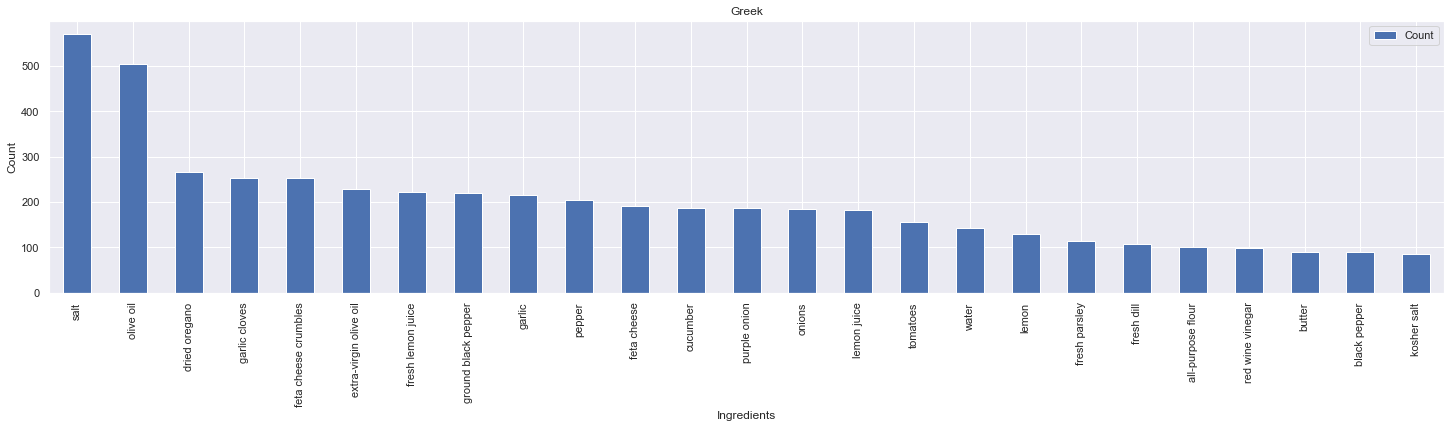

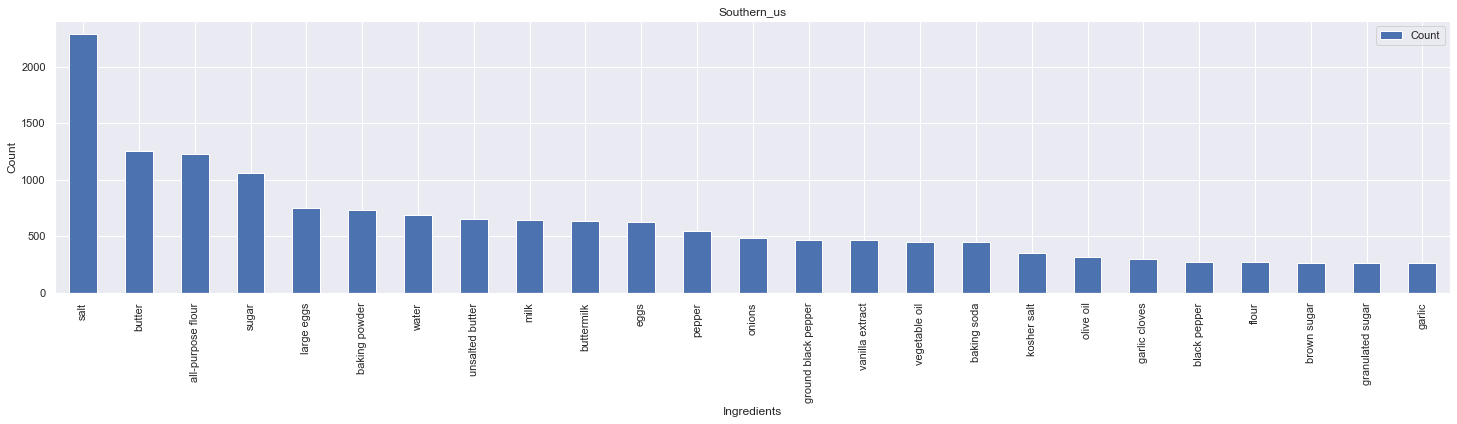

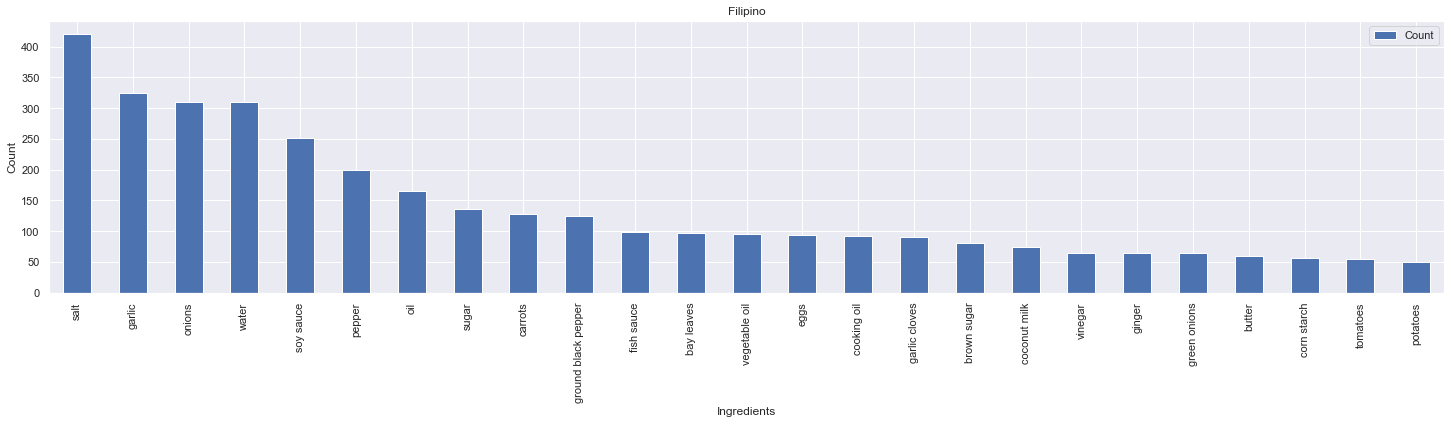

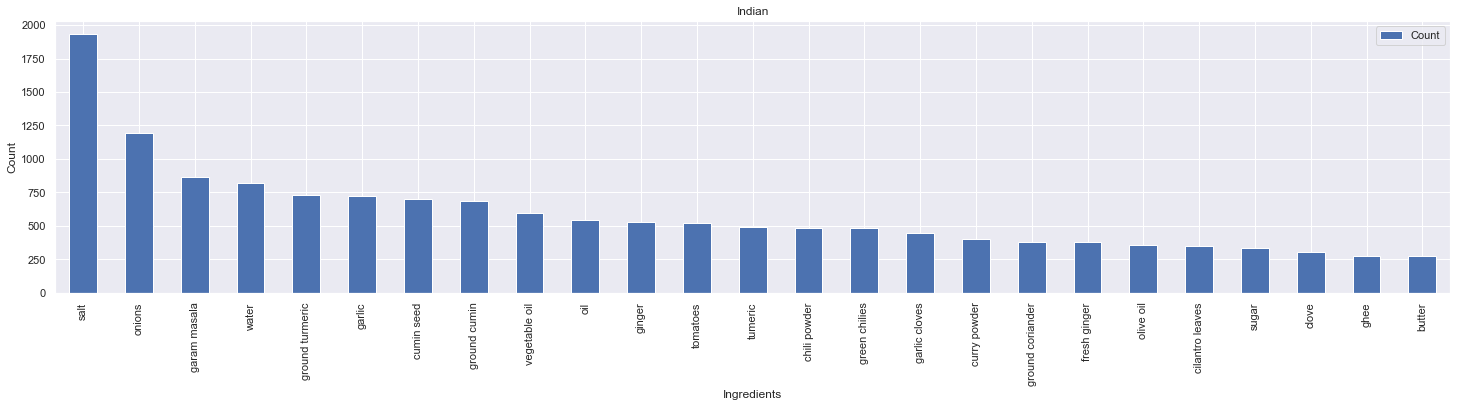

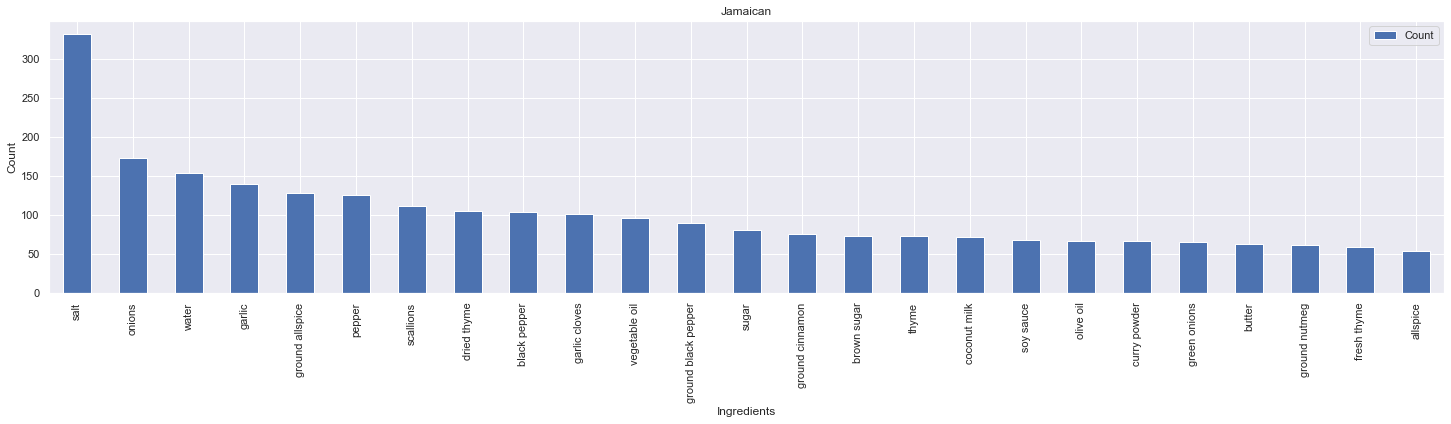

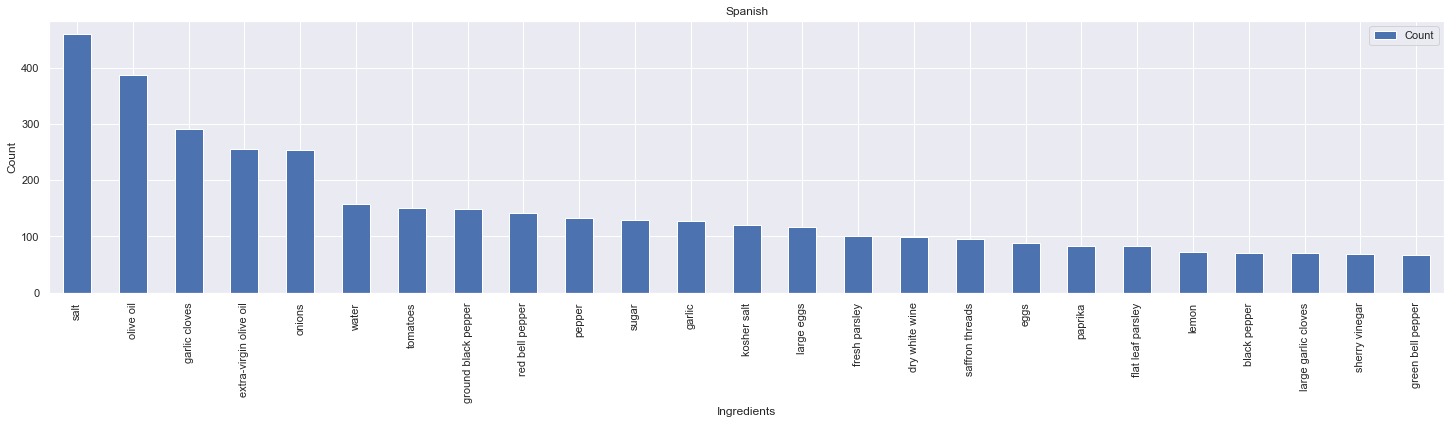

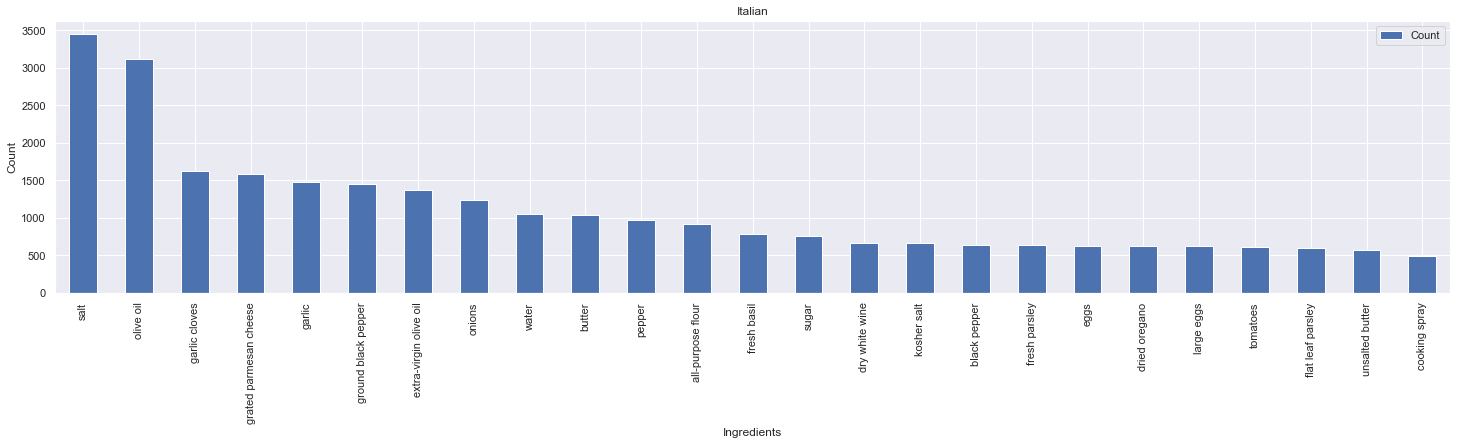

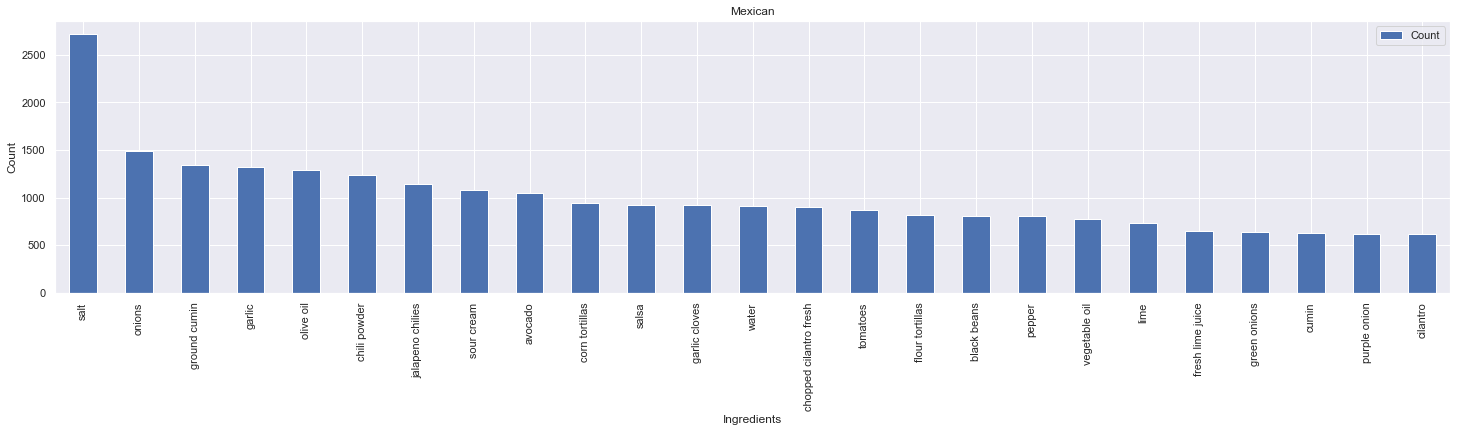

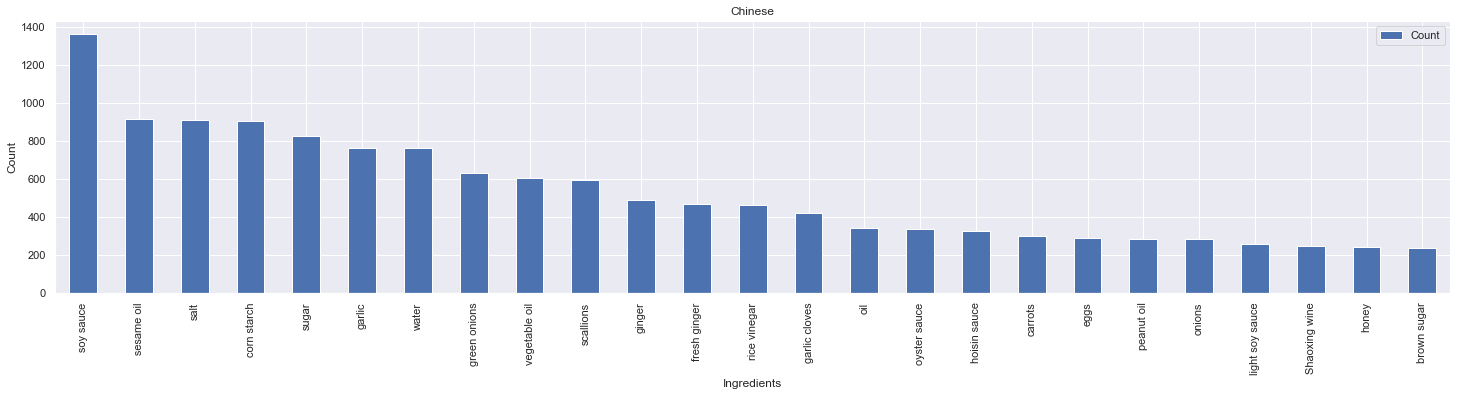

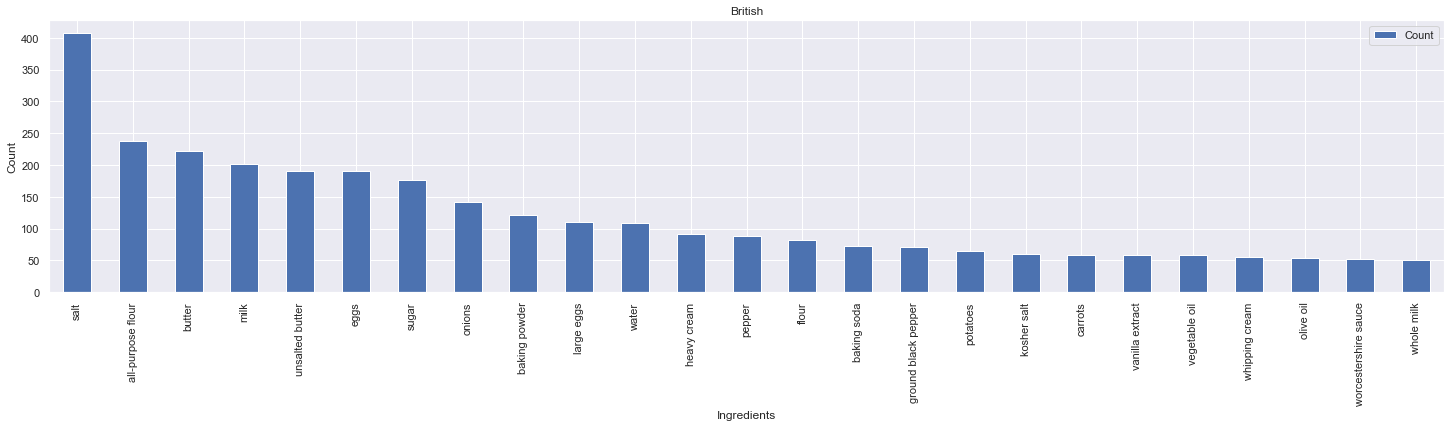

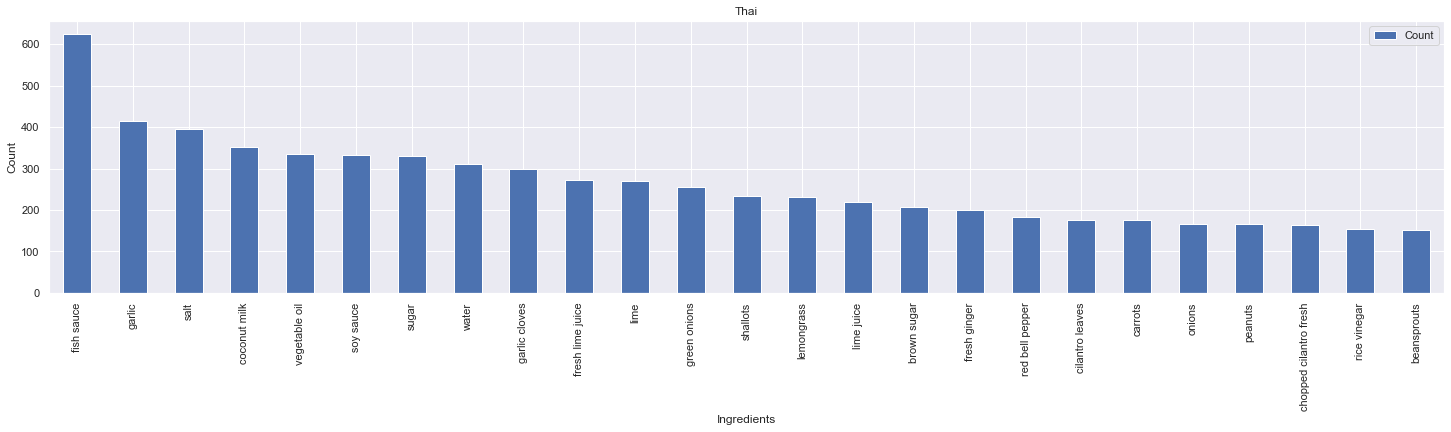

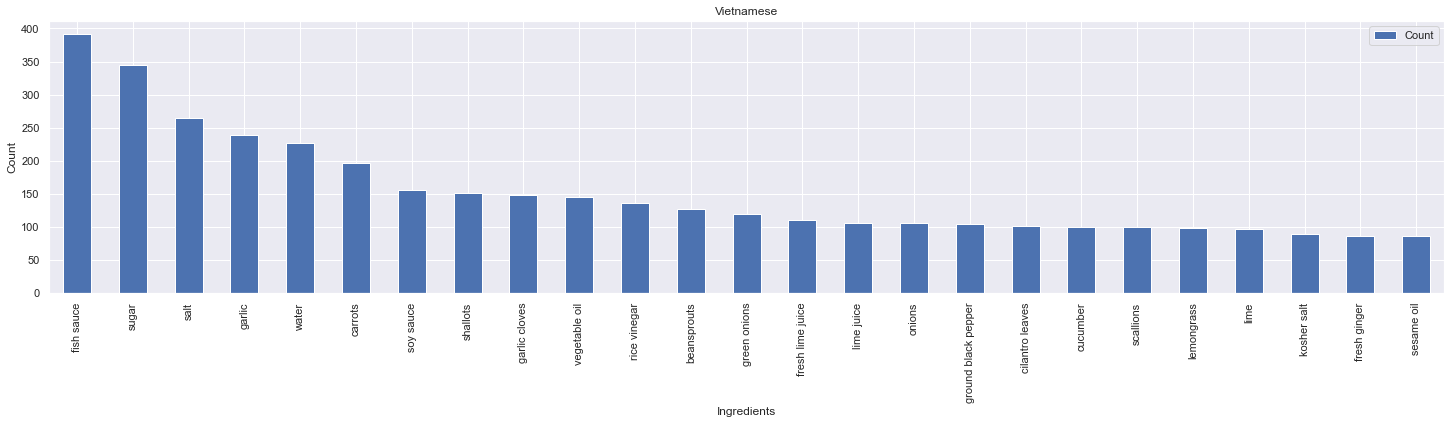

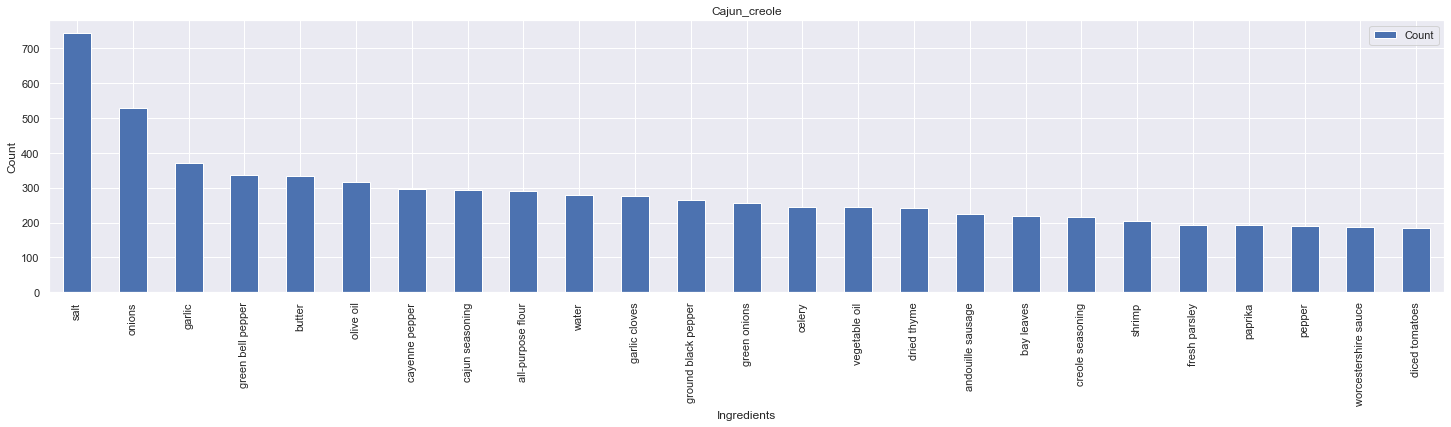

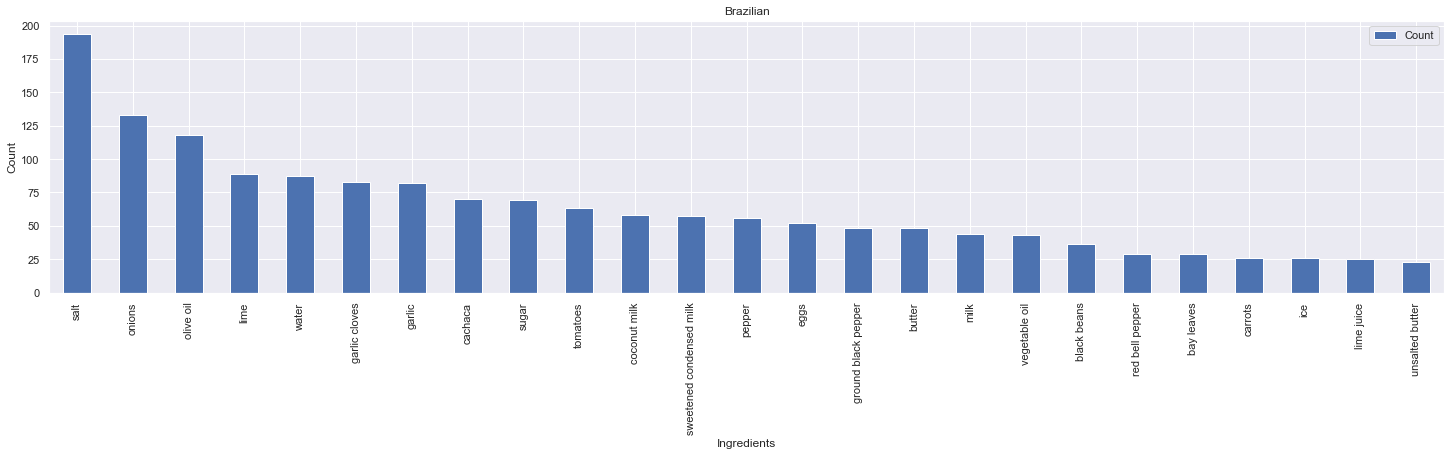

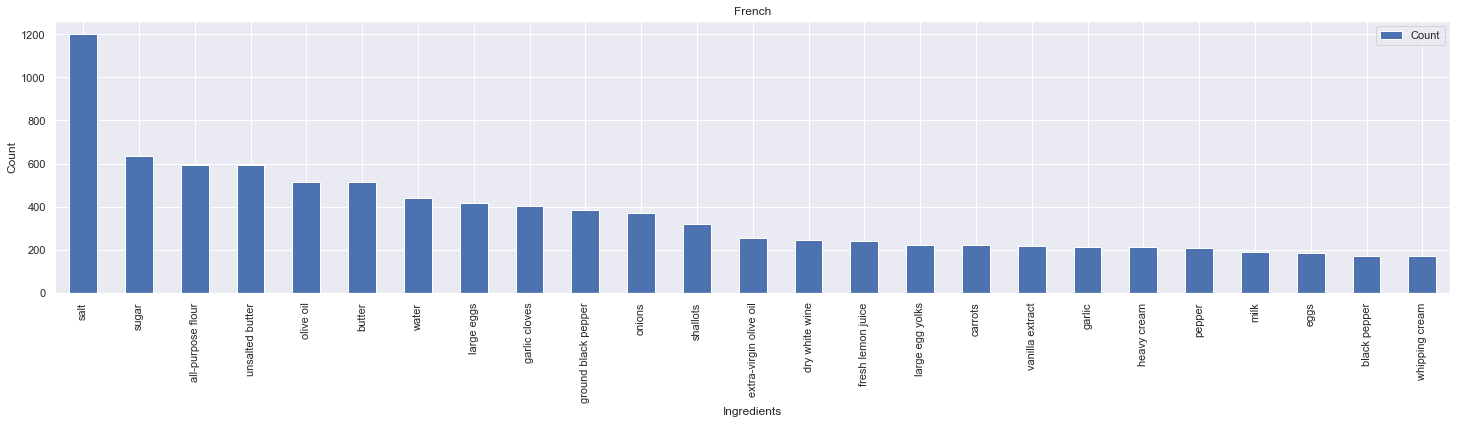

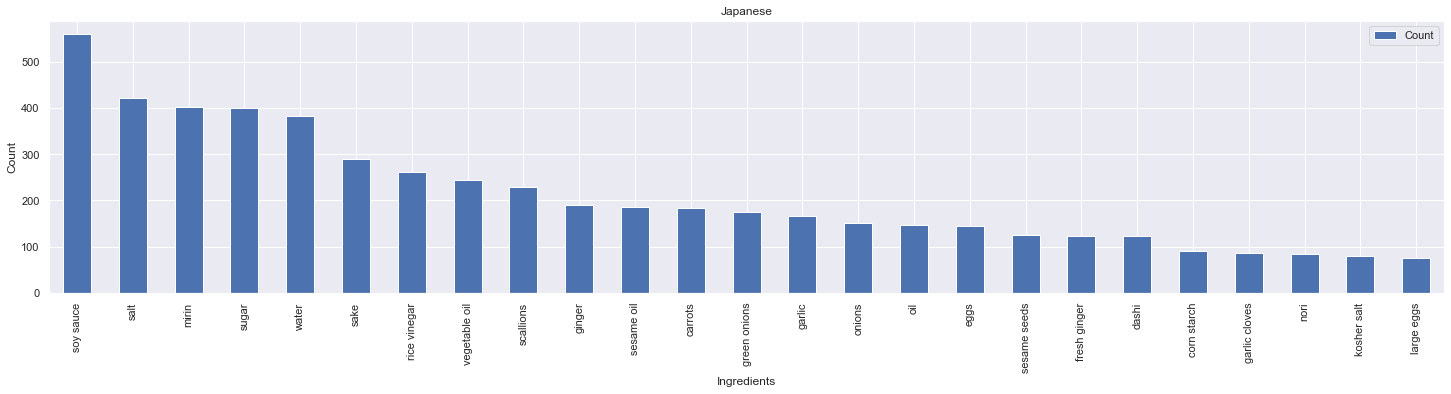

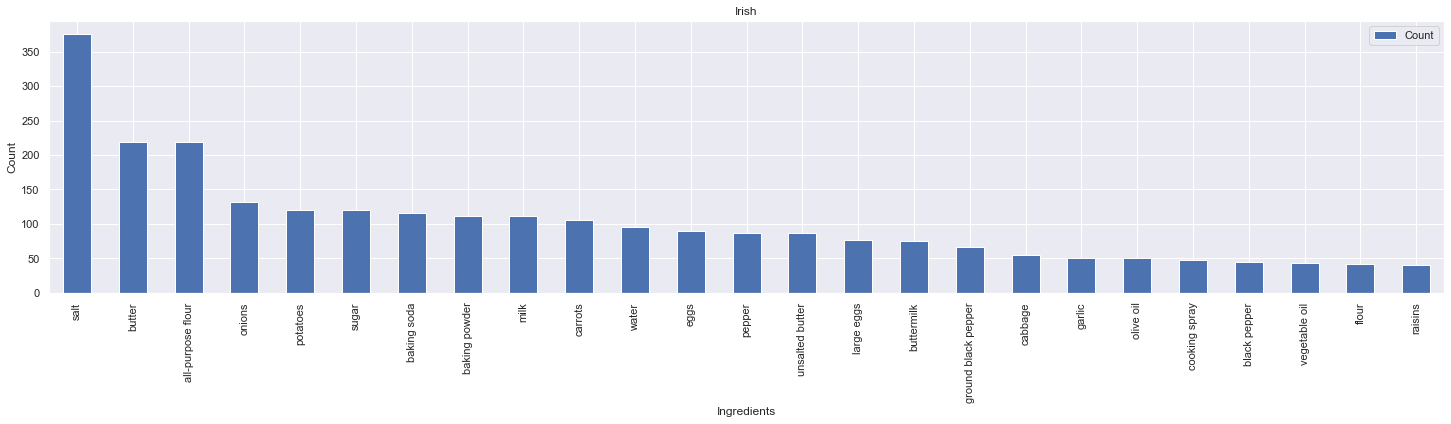

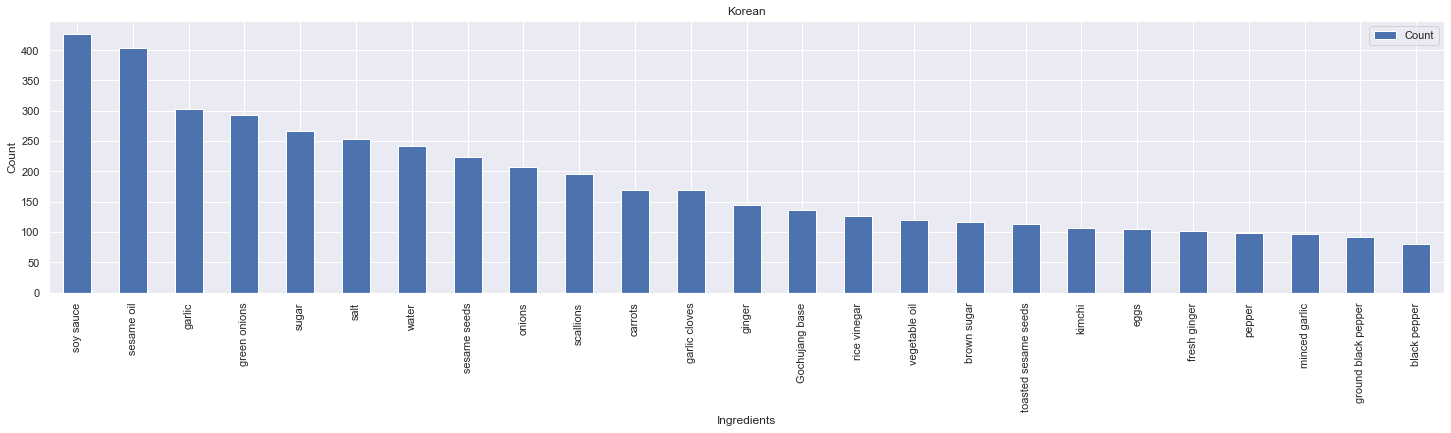

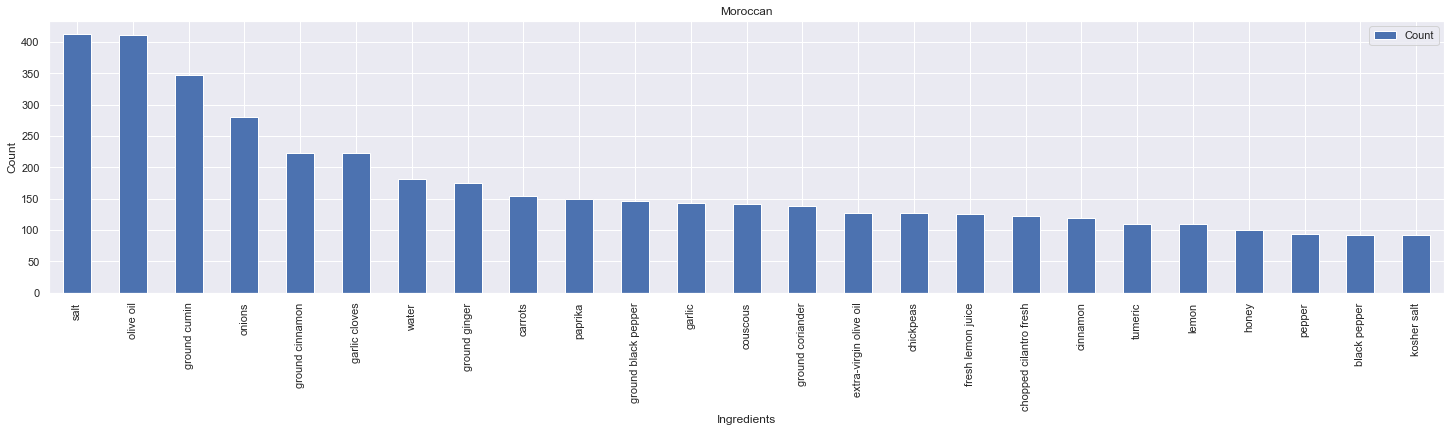

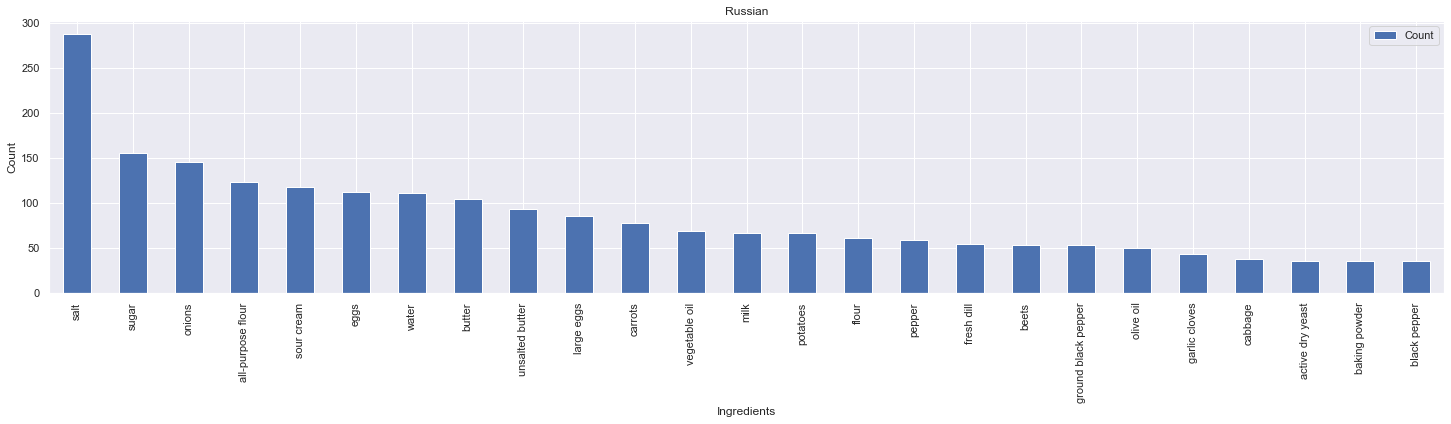

In [12]:
for cuisine in ci['Cuisine'].unique():
    df = ci.loc[ci['Cuisine']==cuisine].head(25)
    df.drop(columns = ['Cuisine']).reset_index(drop=True).plot(x = 'Ingredients', y = 'Count', kind='bar', figsize=(25,5))
    plt.xlabel('Ingredients')
    plt.ylabel('Count')
    plt.title(cuisine)
    plt.show()

## Transforming Data for Machine Learning

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

y_train = cook_train['cuisine'].to_numpy()
X_train = tfidf.fit_transform(cook_train['cumulated_ingredients'])
X_test = tfidf.transform(cook_test['cumulated_ingredients'])

display(y_train)
display(X_train)
display(X_test)

array(['Greek', 'Southern_us', 'Filipino', ..., 'Irish', 'Chinese',
       'Mexican'], dtype=object)

<39774x6698 sparse matrix of type '<class 'numpy.float64'>'
	with 428249 stored elements in Compressed Sparse Row format>

<9944x6698 sparse matrix of type '<class 'numpy.float64'>'
	with 106926 stored elements in Compressed Sparse Row format>

## Logistic Regression

In [15]:
parameters ={'C':[0.001, 0.1, 1, 10, 50, 100, 500, 1000, 5000], 'penalty':['l2'], 'solver':['lbfgs']}

In [16]:
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 50, 100, 500, 1000, 5000],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

In [17]:
print("Tuned Hyperparameters for Logistic Regression: ", logreg_cv.best_params_)
print("Classification Accuracy: ", logreg_cv.best_score_)

Tuned Hyperparameters for Logistic Regression:  {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Accuracy:  0.7844320718945399


In [18]:
y_logreg = logreg_cv.predict(X_test)
y_logreg = pd.DataFrame(data = y_logreg).rename(columns = {0: 'Logistic Regression Prediction'})
cook_test = pd.concat([cook_test, y_logreg], axis = 1)
cook_test

,id,ingredients,cumulated_ingredients,number of ingredients,Logistic Regression Prediction
0,18009,"[baking powder, raisins, milk, white sugar, eg...",baking_powder raisins milk white_sugar eggs al...,6,British
1,28583,"[vanilla wafers, bananas, light rum, egg yolks...",vanilla_wafers bananas light_rum egg_yolks mil...,11,Southern_us
2,41580,"[sausage links, fronds, onions, fennel bulb, o...",sausage_links fronds onions fennel_bulb olive_...,6,Italian
3,29752,"[garlic cloves, dried thyme, all-purpose flour...",garlic_cloves dried_thyme all-purpose_flour br...,21,Cajun_creole
4,35687,"[ground black pepper, leeks, parmigiano reggia...",ground_black_pepper leeks parmigiano_reggiano_...,8,Italian
...,...,...,...,...,...
9939,30246,"[large egg whites, large egg yolks, salt, anjo...",large_egg_whites large_egg_yolks salt anjou_pe...,9,French
9940,36028,"[salt, sweet potatoes, hot sauce, adobo sauce,...",salt sweet_potatoes hot_sauce adobo_sauce butter,5,Southern_us
9941,22339,"[black pepper, parmigiano reggiano cheese, sal...",black_pepper parmigiano_reggiano_cheese salt l...,8,Italian
9942,42525,"[quickcooking grits, cayenne, Tabasco Pepper S...",quickcooking_grits cayenne Tabasco_Pepper_Sauc...,15,Southern_us


## Decision Trees

In [19]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [20]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [21]:
print("Tuned Hyperparameters for Decision Trees: ", tree_cv.best_params_)
print("Classification Accuracy: ", tree_cv.best_score_)

Tuned Hyperparameters for Decision Trees:  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Classification Accuracy:  0.34299004090008245


In [22]:
y_tree = tree_cv.predict(X_test)
y_tree = pd.DataFrame(data = y_tree).rename(columns = {0: 'Decision Tree Prediction'})
cook_test = pd.concat([cook_test, y_tree], axis = 1)
cook_test

,id,ingredients,cumulated_ingredients,number of ingredients,Logistic Regression Prediction,Decision Tree Prediction
0,18009,"[baking powder, raisins, milk, white sugar, eg...",baking_powder raisins milk white_sugar eggs al...,6,British,Southern_us
1,28583,"[vanilla wafers, bananas, light rum, egg yolks...",vanilla_wafers bananas light_rum egg_yolks mil...,11,Southern_us,Italian
2,41580,"[sausage links, fronds, onions, fennel bulb, o...",sausage_links fronds onions fennel_bulb olive_...,6,Italian,Italian
3,29752,"[garlic cloves, dried thyme, all-purpose flour...",garlic_cloves dried_thyme all-purpose_flour br...,21,Cajun_creole,Cajun_creole
4,35687,"[ground black pepper, leeks, parmigiano reggia...",ground_black_pepper leeks parmigiano_reggiano_...,8,Italian,Italian
...,...,...,...,...,...,...
9939,30246,"[large egg whites, large egg yolks, salt, anjo...",large_egg_whites large_egg_yolks salt anjou_pe...,9,French,Italian
9940,36028,"[salt, sweet potatoes, hot sauce, adobo sauce,...",salt sweet_potatoes hot_sauce adobo_sauce butter,5,Southern_us,Italian
9941,22339,"[black pepper, parmigiano reggiano cheese, sal...",black_pepper parmigiano_reggiano_cheese salt l...,8,Italian,Italian
9942,42525,"[quickcooking grits, cayenne, Tabasco Pepper S...",quickcooking_grits cayenne Tabasco_Pepper_Sauc...,15,Southern_us,Italian


## K-Nearest Neighbours 

In [23]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [24]:
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "
C:\ProgramData\Anaconda3\

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [25]:
print("Tuned Hyperparameters for KNN: ", knn_cv.best_params_)
print("Classification Accuracy: ", knn_cv.best_score_)

Tuned Hyperparameters for KNN:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2}
Classification Accuracy:  0.7409360674051766


In [26]:
y_knn = knn_cv.predict(X_test)
y_knn = pd.DataFrame(data = y_knn).rename(columns = {0: 'KNN Prediction'})
cook_test = pd.concat([cook_test, y_knn], axis = 1)
cook_test

,id,ingredients,cumulated_ingredients,number of ingredients,Logistic Regression Prediction,Decision Tree Prediction,KNN Prediction
0,18009,"[baking powder, raisins, milk, white sugar, eg...",baking_powder raisins milk white_sugar eggs al...,6,British,Southern_us,Irish
1,28583,"[vanilla wafers, bananas, light rum, egg yolks...",vanilla_wafers bananas light_rum egg_yolks mil...,11,Southern_us,Italian,Southern_us
2,41580,"[sausage links, fronds, onions, fennel bulb, o...",sausage_links fronds onions fennel_bulb olive_...,6,Italian,Italian,Italian
3,29752,"[garlic cloves, dried thyme, all-purpose flour...",garlic_cloves dried_thyme all-purpose_flour br...,21,Cajun_creole,Cajun_creole,Cajun_creole
4,35687,"[ground black pepper, leeks, parmigiano reggia...",ground_black_pepper leeks parmigiano_reggiano_...,8,Italian,Italian,Italian
...,...,...,...,...,...,...,...
9939,30246,"[large egg whites, large egg yolks, salt, anjo...",large_egg_whites large_egg_yolks salt anjou_pe...,9,French,Italian,French
9940,36028,"[salt, sweet potatoes, hot sauce, adobo sauce,...",salt sweet_potatoes hot_sauce adobo_sauce butter,5,Southern_us,Italian,Mexican
9941,22339,"[black pepper, parmigiano reggiano cheese, sal...",black_pepper parmigiano_reggiano_cheese salt l...,8,Italian,Italian,Italian
9942,42525,"[quickcooking grits, cayenne, Tabasco Pepper S...",quickcooking_grits cayenne Tabasco_Pepper_Sauc...,15,Southern_us,Italian,Southern_us


## Final Scores

In [27]:
score_dict = {'ML Algorithm': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbours'], 
              'Score': [logreg_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]}

score_df = pd.DataFrame(score_dict)
score_df['Score'] = score_df['Score']*100

max_score = score_df[score_df['Score']==score_df['Score'].max()]
min_score = score_df[score_df['Score']==score_df['Score'].min()]

avg_score = rounding(score_df['Score'].mean(), 4) + '%'
score_df['Score'] = score_df['Score'].apply(lambda x: rounding(x, 4) + '%')

display(score_df)

,ML Algorithm,Score
0,Logistic Regression,78.4432%
1,Decision Tree,34.2990%
2,K-Nearest Neighbours,74.0936%


In [28]:
max_score['Score'] = max_score['Score'].apply(lambda x: rounding(x, 4) + '%')
print('The method/s performing best is/are: ')
display(max_score)

The method/s performing best is/are: 


<ipython-input-28-57ee7c0fa3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_score['Score'] = max_score['Score'].apply(lambda x: rounding(x, 4) + '%')


,ML Algorithm,Score
0,Logistic Regression,78.4432%


In [29]:
min_score['Score'] = min_score['Score'].apply(lambda x: rounding(x, 4) + '%')
print('The method/s with the least classification accuracy is/are: ')
display(min_score)

The method/s with the least classification accuracy is/are: 


<ipython-input-29-d1a7c9151c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_score['Score'] = min_score['Score'].apply(lambda x: rounding(x, 4) + '%')


,ML Algorithm,Score
1,Decision Tree,34.2990%


In [30]:
print('The average classification accuracy across all ML algorithms is: ' + avg_score)

The average classification accuracy across all ML algorithms is: 62.2786%


## Final Output

In [31]:
cook_test.drop(columns = ['cumulated_ingredients', 'number of ingredients'], inplace = True)
cook_test.rename(columns = {'id': 'ID', 'ingredients': 'Ingredients'}, inplace = True)
cook_test

,ID,Ingredients,Logistic Regression Prediction,Decision Tree Prediction,KNN Prediction
0,18009,"[baking powder, raisins, milk, white sugar, eg...",British,Southern_us,Irish
1,28583,"[vanilla wafers, bananas, light rum, egg yolks...",Southern_us,Italian,Southern_us
2,41580,"[sausage links, fronds, onions, fennel bulb, o...",Italian,Italian,Italian
3,29752,"[garlic cloves, dried thyme, all-purpose flour...",Cajun_creole,Cajun_creole,Cajun_creole
4,35687,"[ground black pepper, leeks, parmigiano reggia...",Italian,Italian,Italian
...,...,...,...,...,...
9939,30246,"[large egg whites, large egg yolks, salt, anjo...",French,Italian,French
9940,36028,"[salt, sweet potatoes, hot sauce, adobo sauce,...",Southern_us,Italian,Mexican
9941,22339,"[black pepper, parmigiano reggiano cheese, sal...",Italian,Italian,Italian
9942,42525,"[quickcooking grits, cayenne, Tabasco Pepper S...",Southern_us,Italian,Southern_us


In [32]:
cook_test.to_excel('./ML Result/Predicted Cuisines.xlsx', index = False)
score_df.to_excel('./ML Result/Accuracy of ML Algorithms.xlsx', index = False)